In [0]:
#!pip install cirq

## GSoC 2020 Student Application Test
CERN Project: Quantum Machine Learning for High Energy Physics


In [0]:
import cirq
import numpy as np

### Task 1
1. Create a circuit with 5 qubits
2. Apply Hadamard operation on every qubit
3. Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
4. SWAP (0, 4)
5. Rotate X with pi/2
6. Plot the circuit


In [3]:
qubit_ids = [i for i in range(5)]

qubits = [cirq.GridQubit(i, 0) for i in qubit_ids]
circuit = cirq.Circuit()

circuit.append(cirq.H(q) for q in qubits)
circuit.append(cirq.CX(qubits[i], qubits[i+1]) for i in qubit_ids[:-1])
circuit.append(cirq.SWAP(qubits[0], qubits[4]))
rotation = cirq.rx(np.pi / 2)
circuit.append(rotation(cirq.GridQubit(i, 0)) for i in qubit_ids)

print(circuit)

                                             ┌─────────┐
(0, 0): ───H───@──────────────────────────────×────────────Rx(0.5π)───
               │                              │
(1, 0): ───H───X───@───Rx(0.5π)───────────────┼───────────────────────
                   │                          │
(2, 0): ───H───────X───@──────────Rx(0.5π)────┼───────────────────────
                       │                      │
(3, 0): ───H───────────X──────────@───────────┼Rx(0.5π)───────────────
                                  │           │
(4, 0): ───H──────────────────────X───────────×────────────Rx(0.5π)───
                                             └─────────┘


### Task 2
Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so on.


In [0]:
simulator = cirq.Simulator()

probabilities = []
angles = np.arange(0, 180, 0.1)

iterations = 100
for angle in angles:
  qubit = cirq.GridQubit(0, 0)
  circuit = cirq.Circuit()

  rotation = cirq.rx(angle * np.pi / 180)
  circuit.append(rotation(cirq.GridQubit(0, 0)))
  circuit.append(cirq.measure(qubit))

  result = simulator.run(circuit,  repetitions=iterations)
  count = result.histogram(key='(0, 0)')

  probability = count[0] / iterations * 100
  probabilities.append(probability)

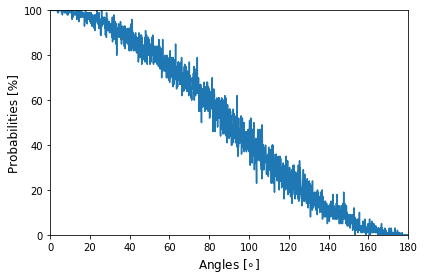

In [5]:
import matplotlib.pyplot as plt

plt.plot(angles, probabilities)

plt.xlim(0, 180)
plt.ylim(0, 100)

plt.xlabel('Angles [$\circ$]', fontsize=12)
plt.ylabel('Probabilities [%]', fontsize=12)

plt.tight_layout()